In [69]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Problems
Problem 1 : Analysis of Numeric Variables
In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.
['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?




In [70]:
p1=housedata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]
p1

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836
...,...,...,...,...
1455,7917,1647,953,460
1456,13175,2073,1542,500
1457,9042,2340,1152,252
1458,9717,1078,1078,240


In [4]:
p1sum=p1.describe().round(2)
p1sum

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.00,1460.00,1460.00,1460.00
mean,10516.83,1515.46,1057.43,472.98
std,9981.26,525.48,438.71,213.80
min,1300.00,334.00,0.00,0.00
25%,7553.50,1129.50,795.75,334.50
50%,9478.50,1464.00,991.50,480.00
75%,11601.50,1776.75,1298.25,576.00
max,215245.00,5642.00,6110.00,1418.00


In [21]:
q1=p1sum.quantile(0.25)
q3=p1sum.quantile(0.75)
iqr=q3-q1
((p1 < q1-1.5*iqr) | (p1 > q3+1.5*iqr)).sum()

LotArea        64
GrLivArea      70
TotalBsmtSF    11
GarageArea      0
dtype: int64

In [19]:
for x in p1:
    outliers = p1[(p1 < p1sum.quantile(0.25) - 1.5 * (p1sum.quantile(0.75) - p1sum.quantile(0.25))) | (p1 > p1sum.quantile(0.75) + 1.5 * (p1sum.quantile(0.75) - p1sum.quantile(0.25)))]
    len(outliers)

1460

b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

<Axes: >

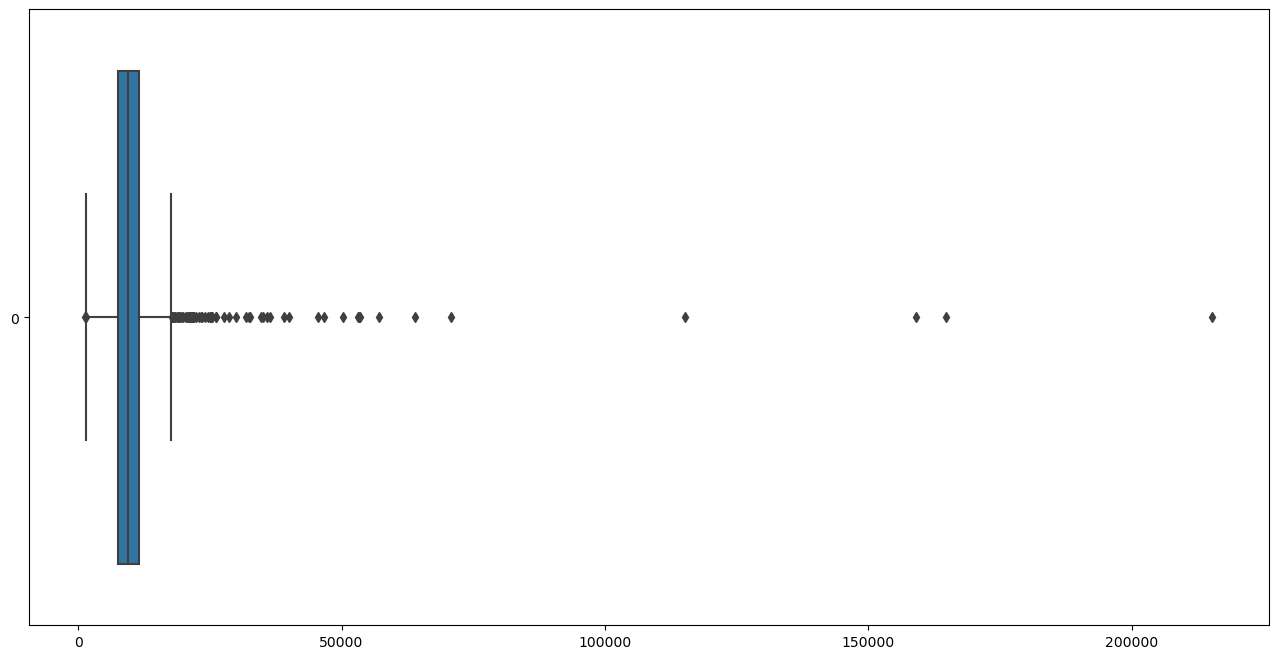

In [22]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["LotArea"], orient="h")

#p1["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea"]

<Axes: >

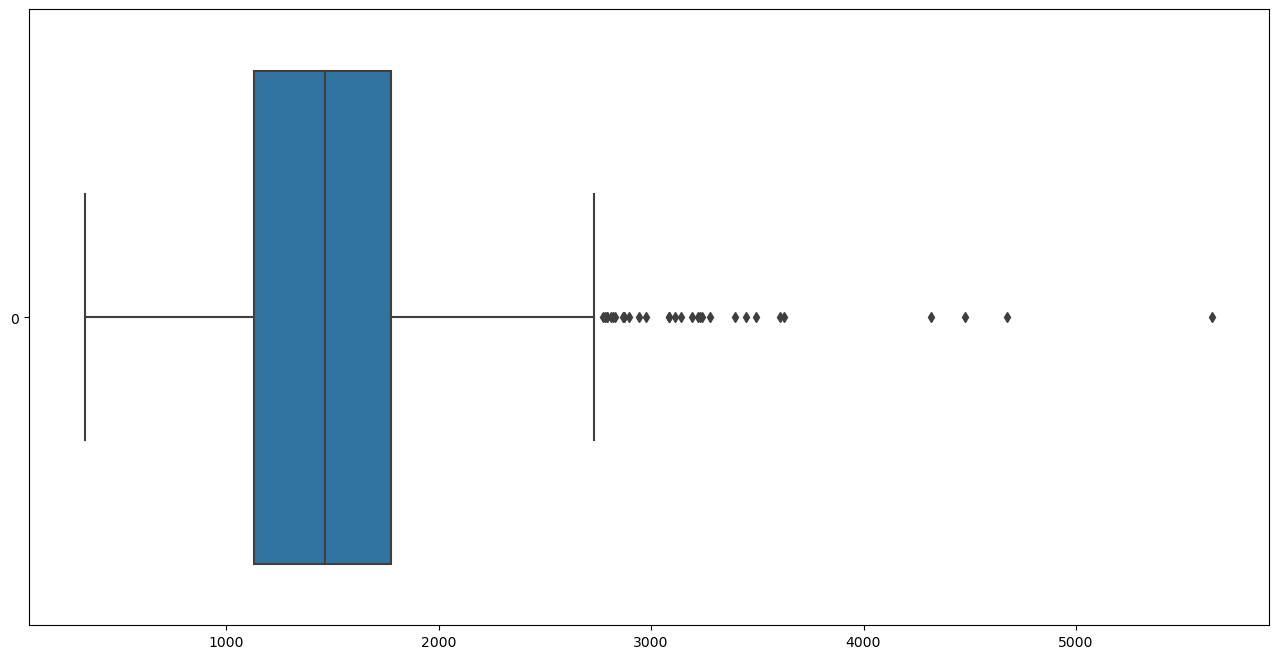

In [23]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["GrLivArea"], orient="h")

<Axes: >

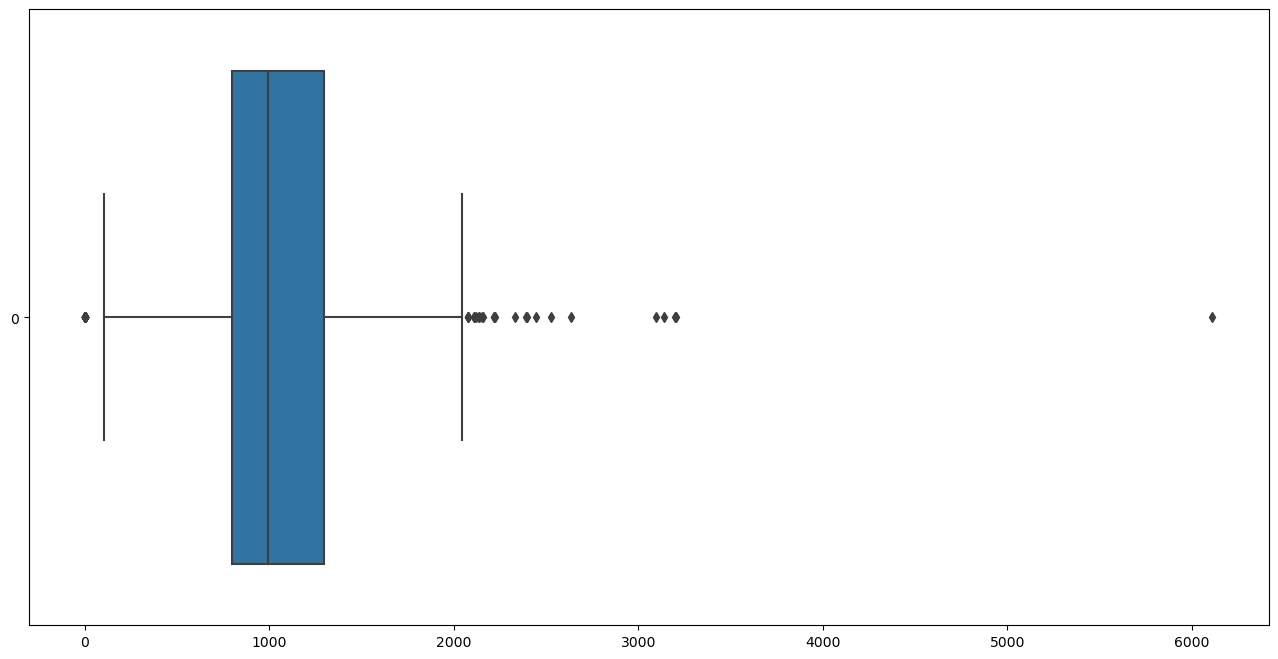

In [24]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["TotalBsmtSF"], orient="h")

<Axes: >

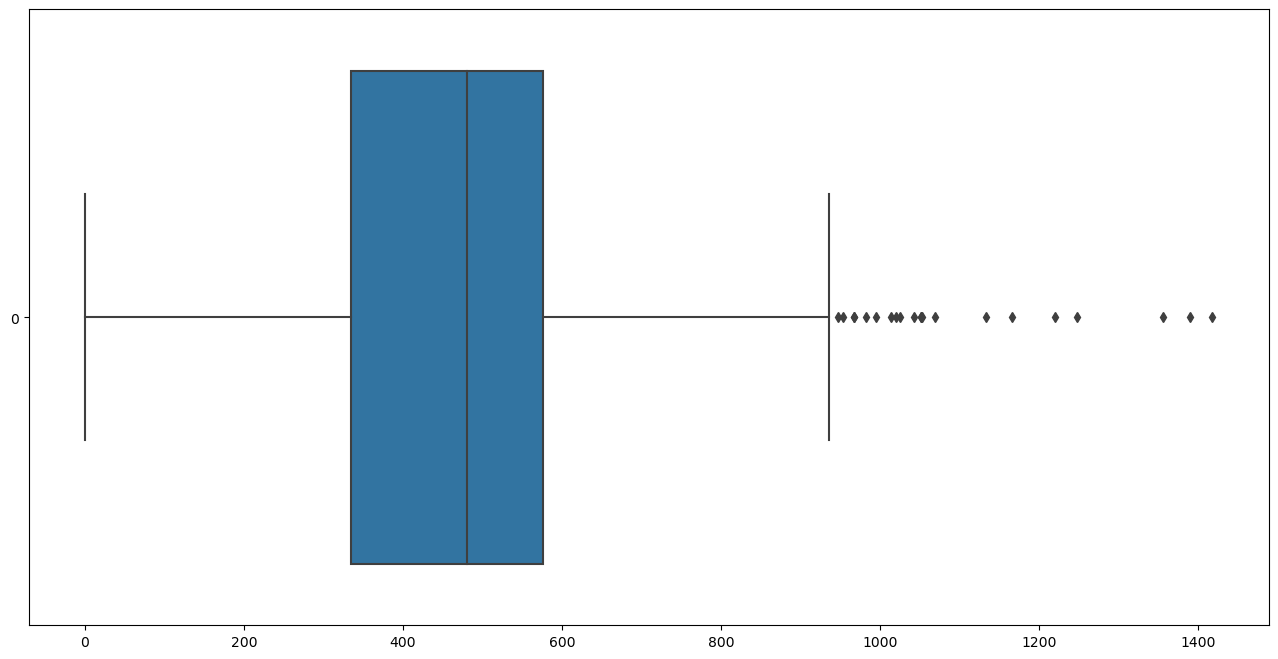

In [25]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["GarageArea"], orient="h")

In [51]:
p1.skew(axis=0, skipna=True)

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.
Hints and Pointers

o In case of box-plot, outliers are the datapoints outside the whiskers, which are at Q1 – 1.5 IQR and Q3 + 1.5 IQR.

o Pandas has a bunch of statistical measures built in as methods/functions; .median() and .mean(), for example.

o Predicting one numeric variable with another numeric variable is easiest when they have a strong relationship.

LotArea has the greatest positive skew, hence it is the most skewed from normal distribution

In [60]:
joinplot = pd.concat([p1,housedata[["SalePrice"]]], axis=1)
joinplot

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000
...,...,...,...,...,...
1455,7917,1647,953,460,175000
1456,13175,2073,1542,500,210000
1457,9042,2340,1152,252,266500
1458,9717,1078,1078,240,142125


In [ ]:
joinplot.corr()

<Axes: >

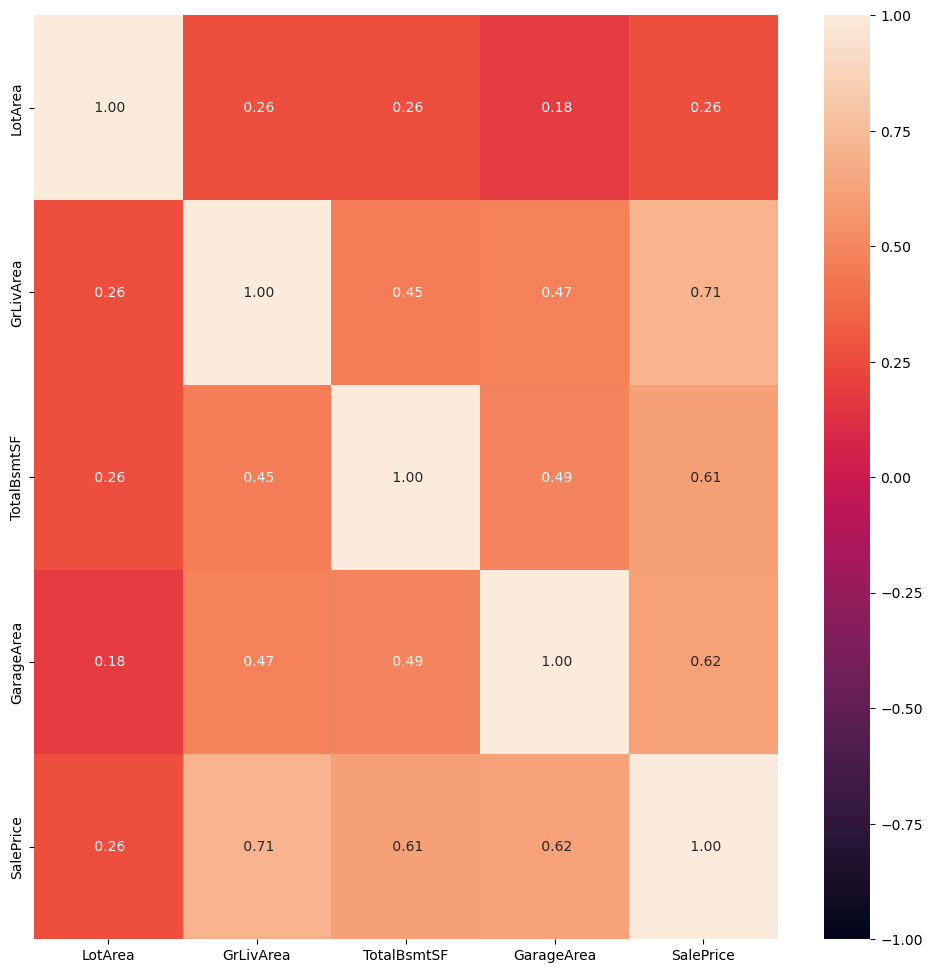

In [61]:
f = plt.figure(figsize=(12,12))
sb.heatmap(joinplot.corr(), vmin=-1, vmax=1, annot=True, fmt=" .2f")

strongest correlation of Saleprice with GrLivArea and GarageArea

In [34]:
p2=housedata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]
p2

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


Problem 2 : Analysis of Categorical Variables
In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.

['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']

a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [38]:
for x in p2:
    print(len(p2[x].unique()))

15
25
5
10


b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data

In [63]:
joinplot1 = pd.concat([p2,housedata[["SalePrice"]]], axis=1)
joinplot1

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000
...,...,...,...,...,...
1455,60,Gilbert,1Fam,6,175000
1456,20,NWAmes,1Fam,6,210000
1457,70,Crawfor,1Fam,7,266500
1458,20,NAmes,1Fam,5,142125


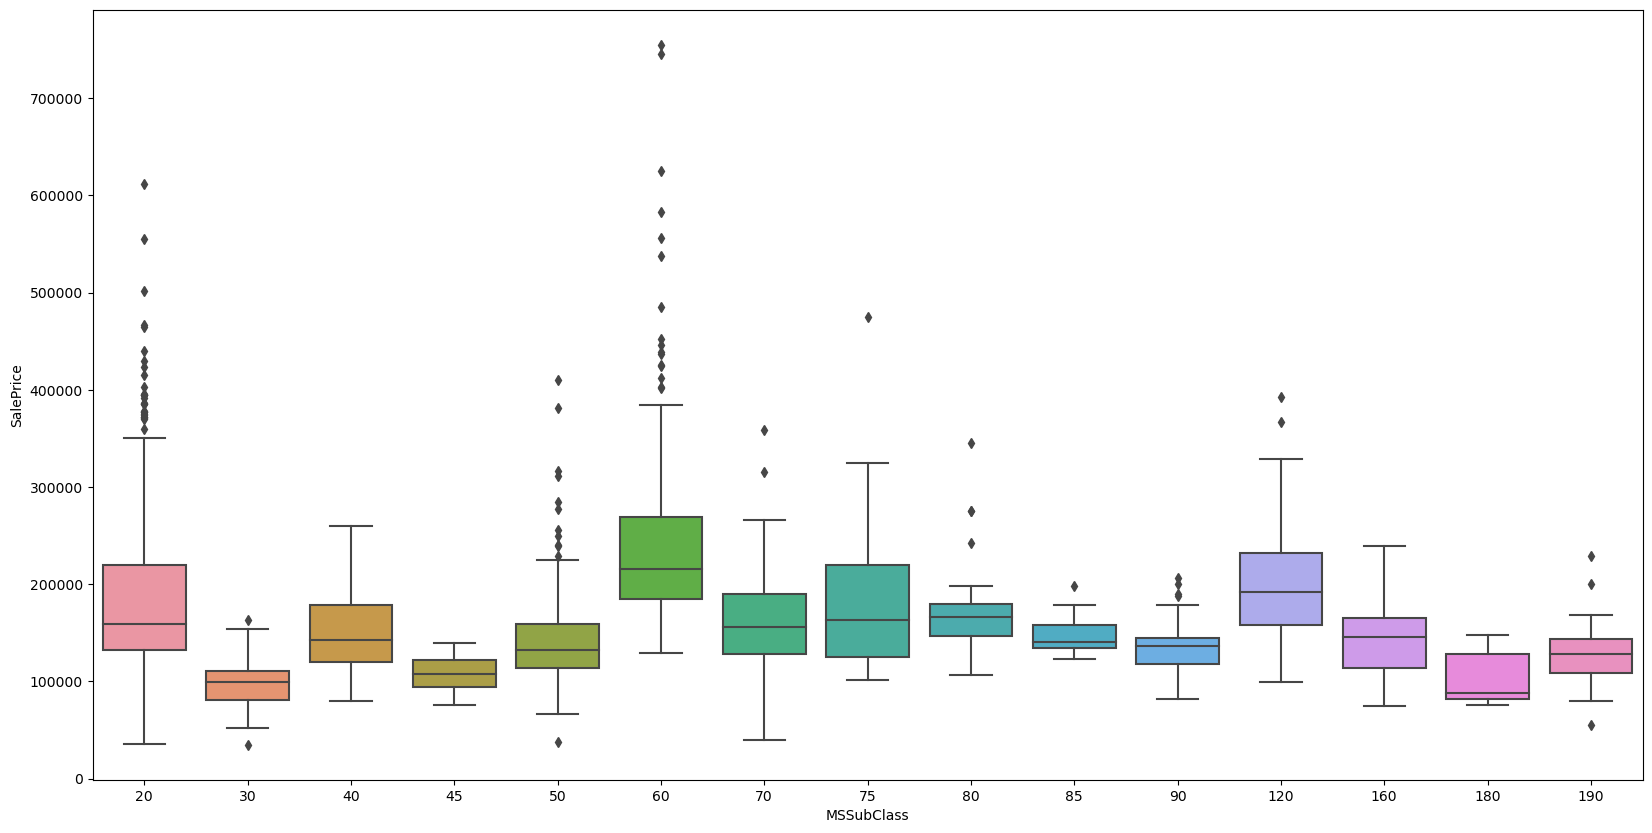

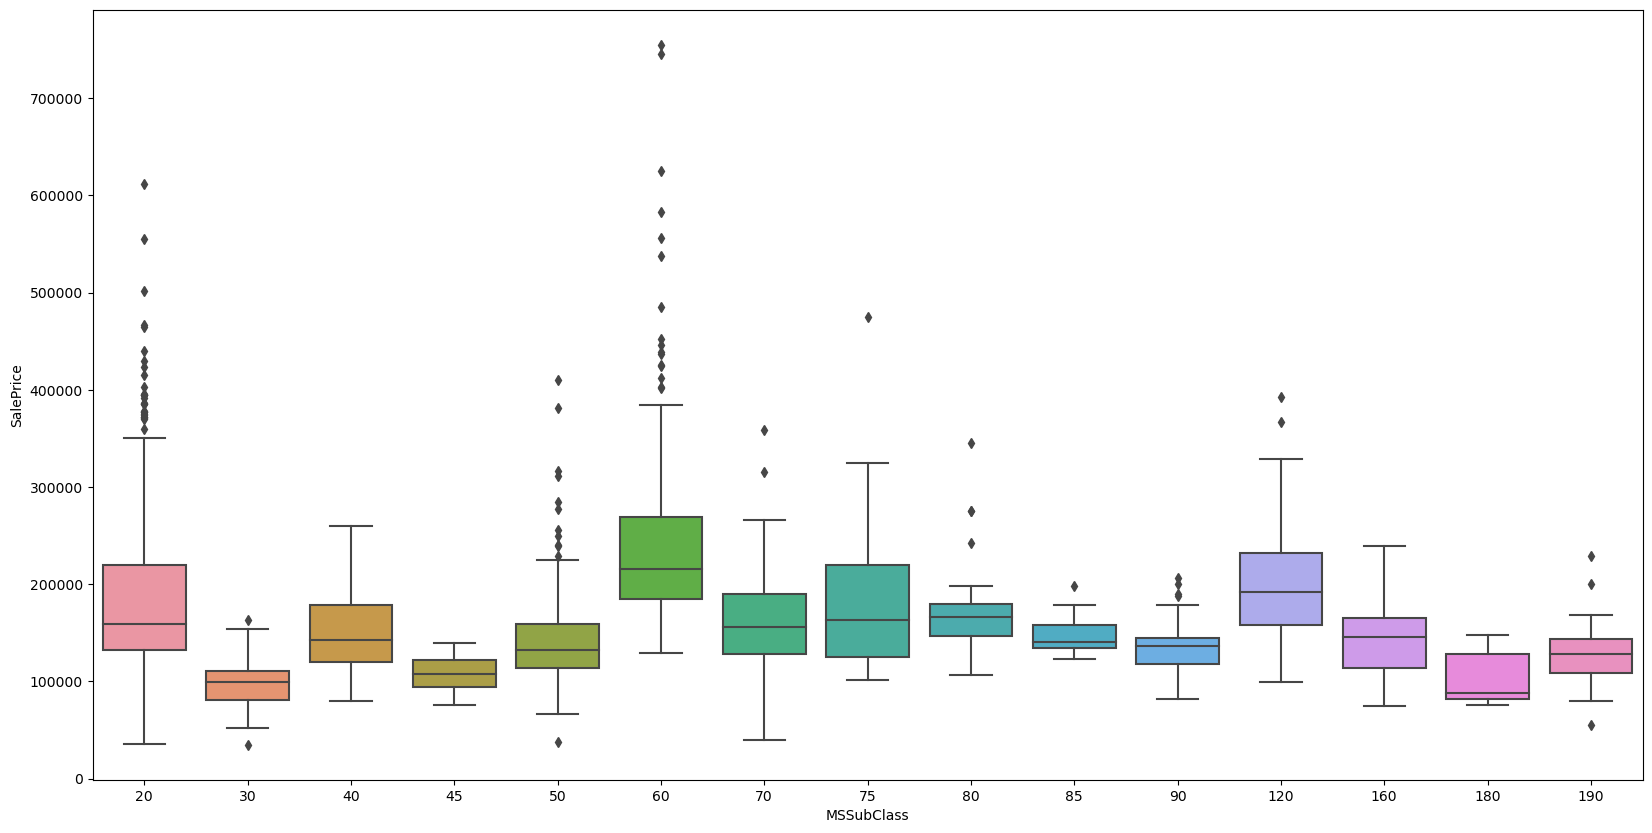

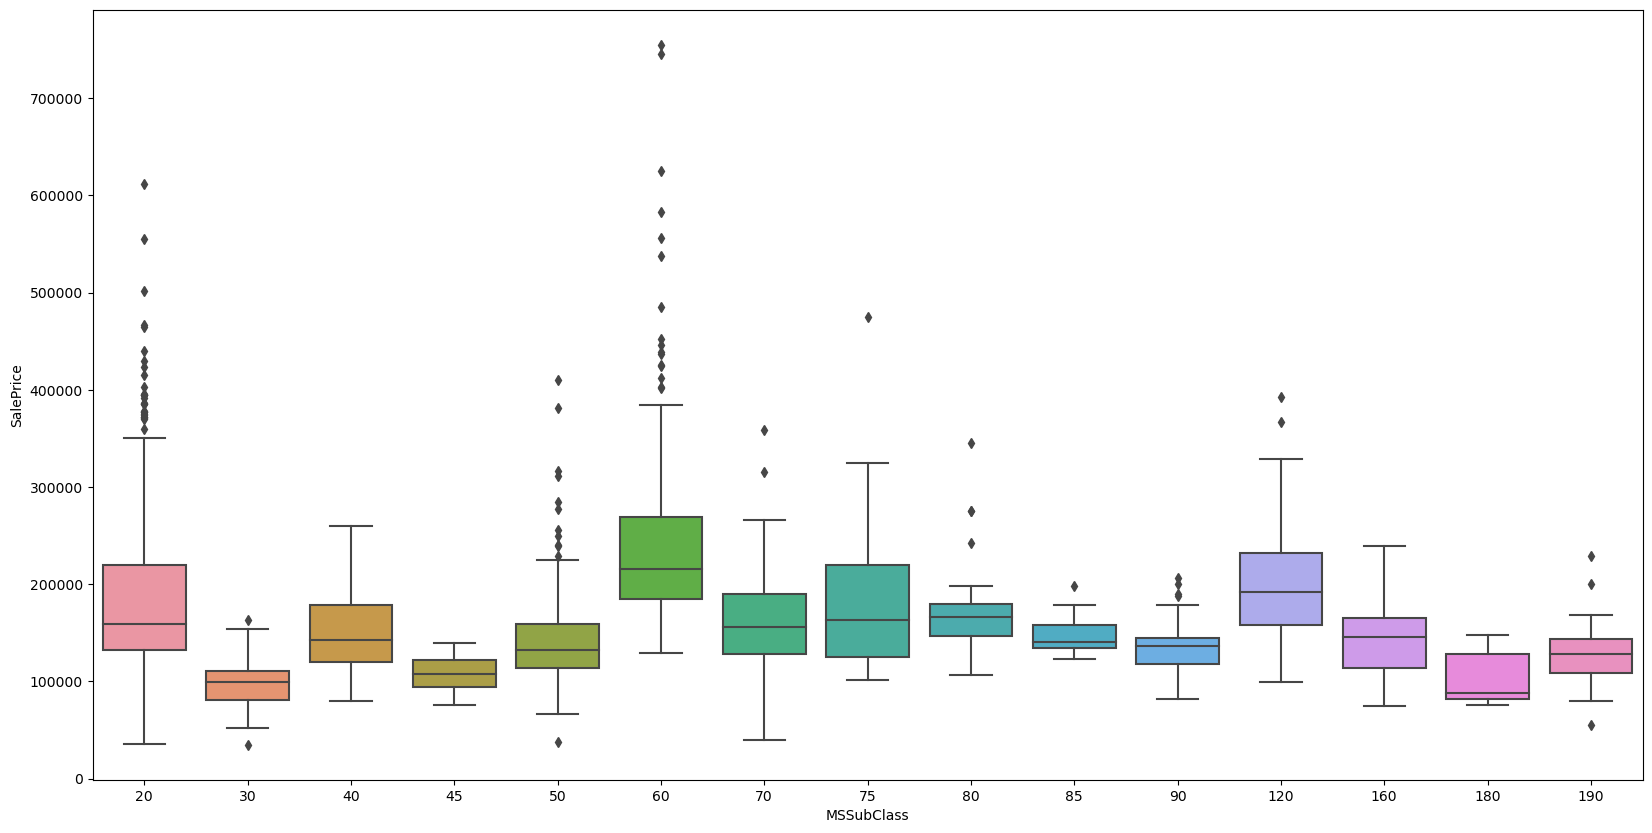

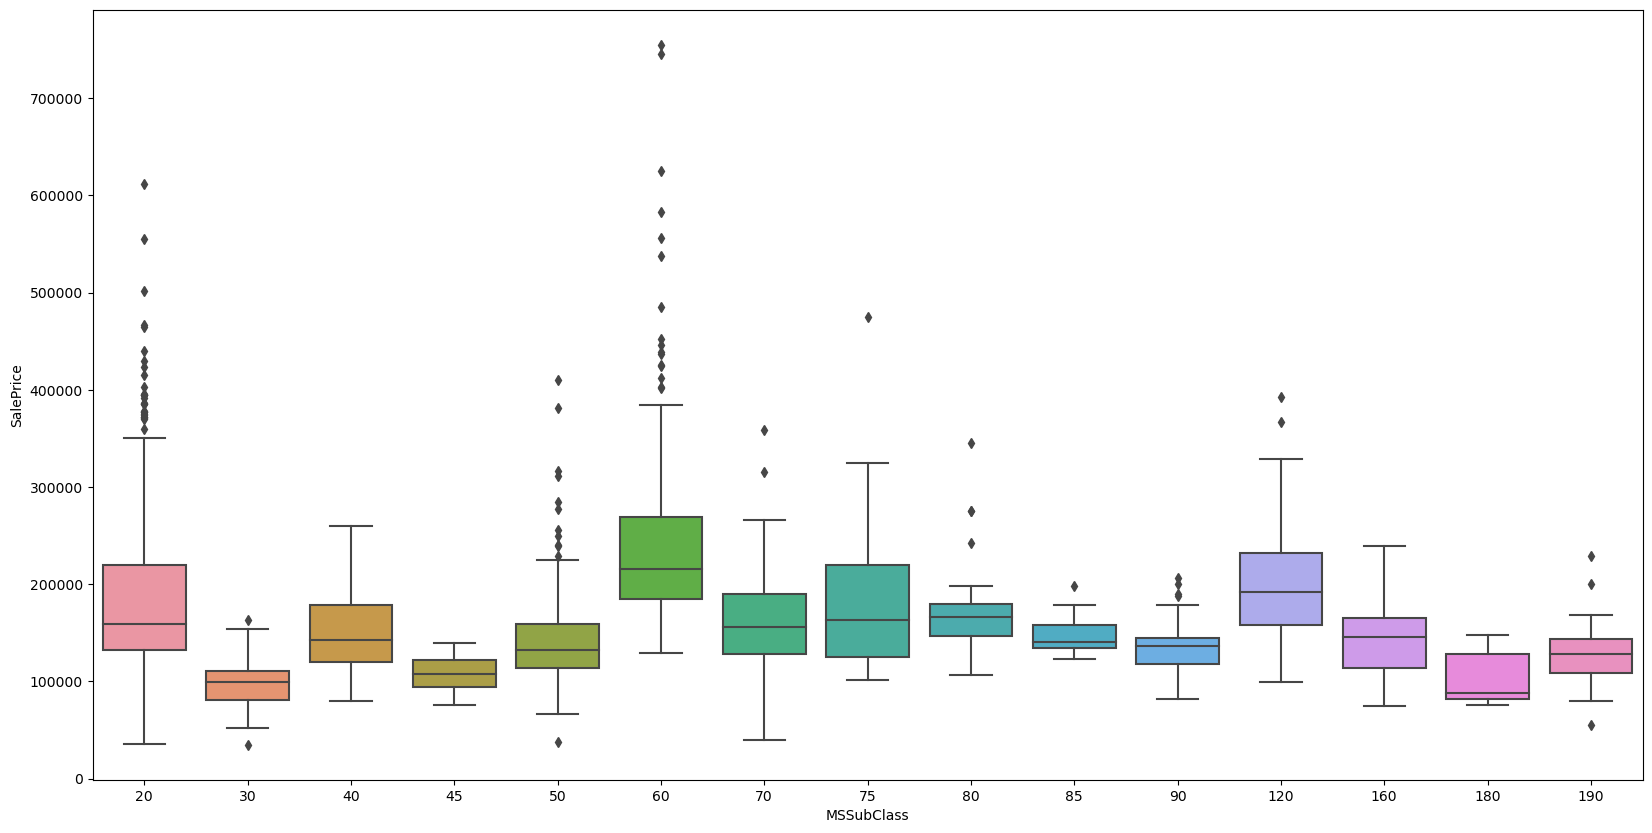

In [61]:
# f, axes = plt.subplots(3, 3, figsize=(18, 12))
#f=plt.figure(figsize=(20,5))
#sb.boxplot(data = joinplot1, orient='v', x='MSSubClass', y='SalePrice')

for var in p2:
    f=plt.figure(figsize=(20,10))
    sb.boxplot(data = joinplot1, orient='v', x='MSSubClass', y='SalePrice')

variable Neighbourhood has the most number of levels

Problem 3 : Interesting Questions for EDA
Choose any ONE of the following questions to answer. You may always try out the other one at home if you want. J
a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

In [83]:
p3=housedata[['GarageType']]
p3['GarageExists']= nil
p3

NameError: name 'nil' is not defined

In [126]:
p3['GarageExists']=np.where(p3[['GarageType']].isnull(), "False", "True")
p3

C:\Users\MsNai\AppData\Local\Temp\ipykernel_22760\3611687956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3['GarageExists']=np.where(p3[['GarageType']].isnull(), "False", "True")


,GarageType,GarageExists
0,Attchd,True
1,Attchd,True
2,Attchd,True
3,Detchd,True
4,Attchd,True
...,...,...
1455,Attchd,True
1456,Attchd,True
1457,Attchd,True
1458,Attchd,True


In [119]:
NoGarage=p3[p3['GarageType'].isnull()==True]
NoGarage.rename(columns={'GarageType': 'No Garage'}, inplace=True)
NoGarage
#GarageExists.rename(columns={'GarageType': 'No Garage'}, inplace=True)

C:\Users\MsNai\AppData\Local\Temp\ipykernel_22760\1981727583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NoGarage.rename(columns={'GarageType': 'No Garage'}, inplace=True)


,No Garage
39,NaN
48,NaN
78,NaN
88,NaN
89,NaN
...,...
1349,NaN
1407,NaN
1449,NaN
1450,NaN


In [109]:
GarageExists=p3[p3['GarageType'].isnull()==False]
GarageExists.rename(columns={'GarageType': 'Garage Exists'}, inplace=True)
GarageExists


C:\Users\MsNai\AppData\Local\Temp\ipykernel_22760\2716693525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GarageExists.rename(columns={'GarageType': 'Garage Exists'}, inplace=True)


,Garage Exists
0,Attchd
1,Attchd
2,Attchd
3,Detchd
4,Attchd
...,...
1455,Attchd
1456,Attchd
1457,Attchd
1458,Attchd


In [125]:
Garage=pd.concat([GarageExists, housedata['SalePrice']], axis=1)
Garage

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [129]:
Garage=pd.concat([p3, housedata['SalePrice']], axis=1)
Garage


,GarageType,GarageExists,SalePrice
0,Attchd,True,208500
1,Attchd,True,181500
2,Attchd,True,223500
3,Detchd,True,140000
4,Attchd,True,250000
...,...,...,...
1455,Attchd,True,175000
1456,Attchd,True,210000
1457,Attchd,True,266500
1458,Attchd,True,142125


<Axes: xlabel='GarageExists', ylabel='SalePrice'>

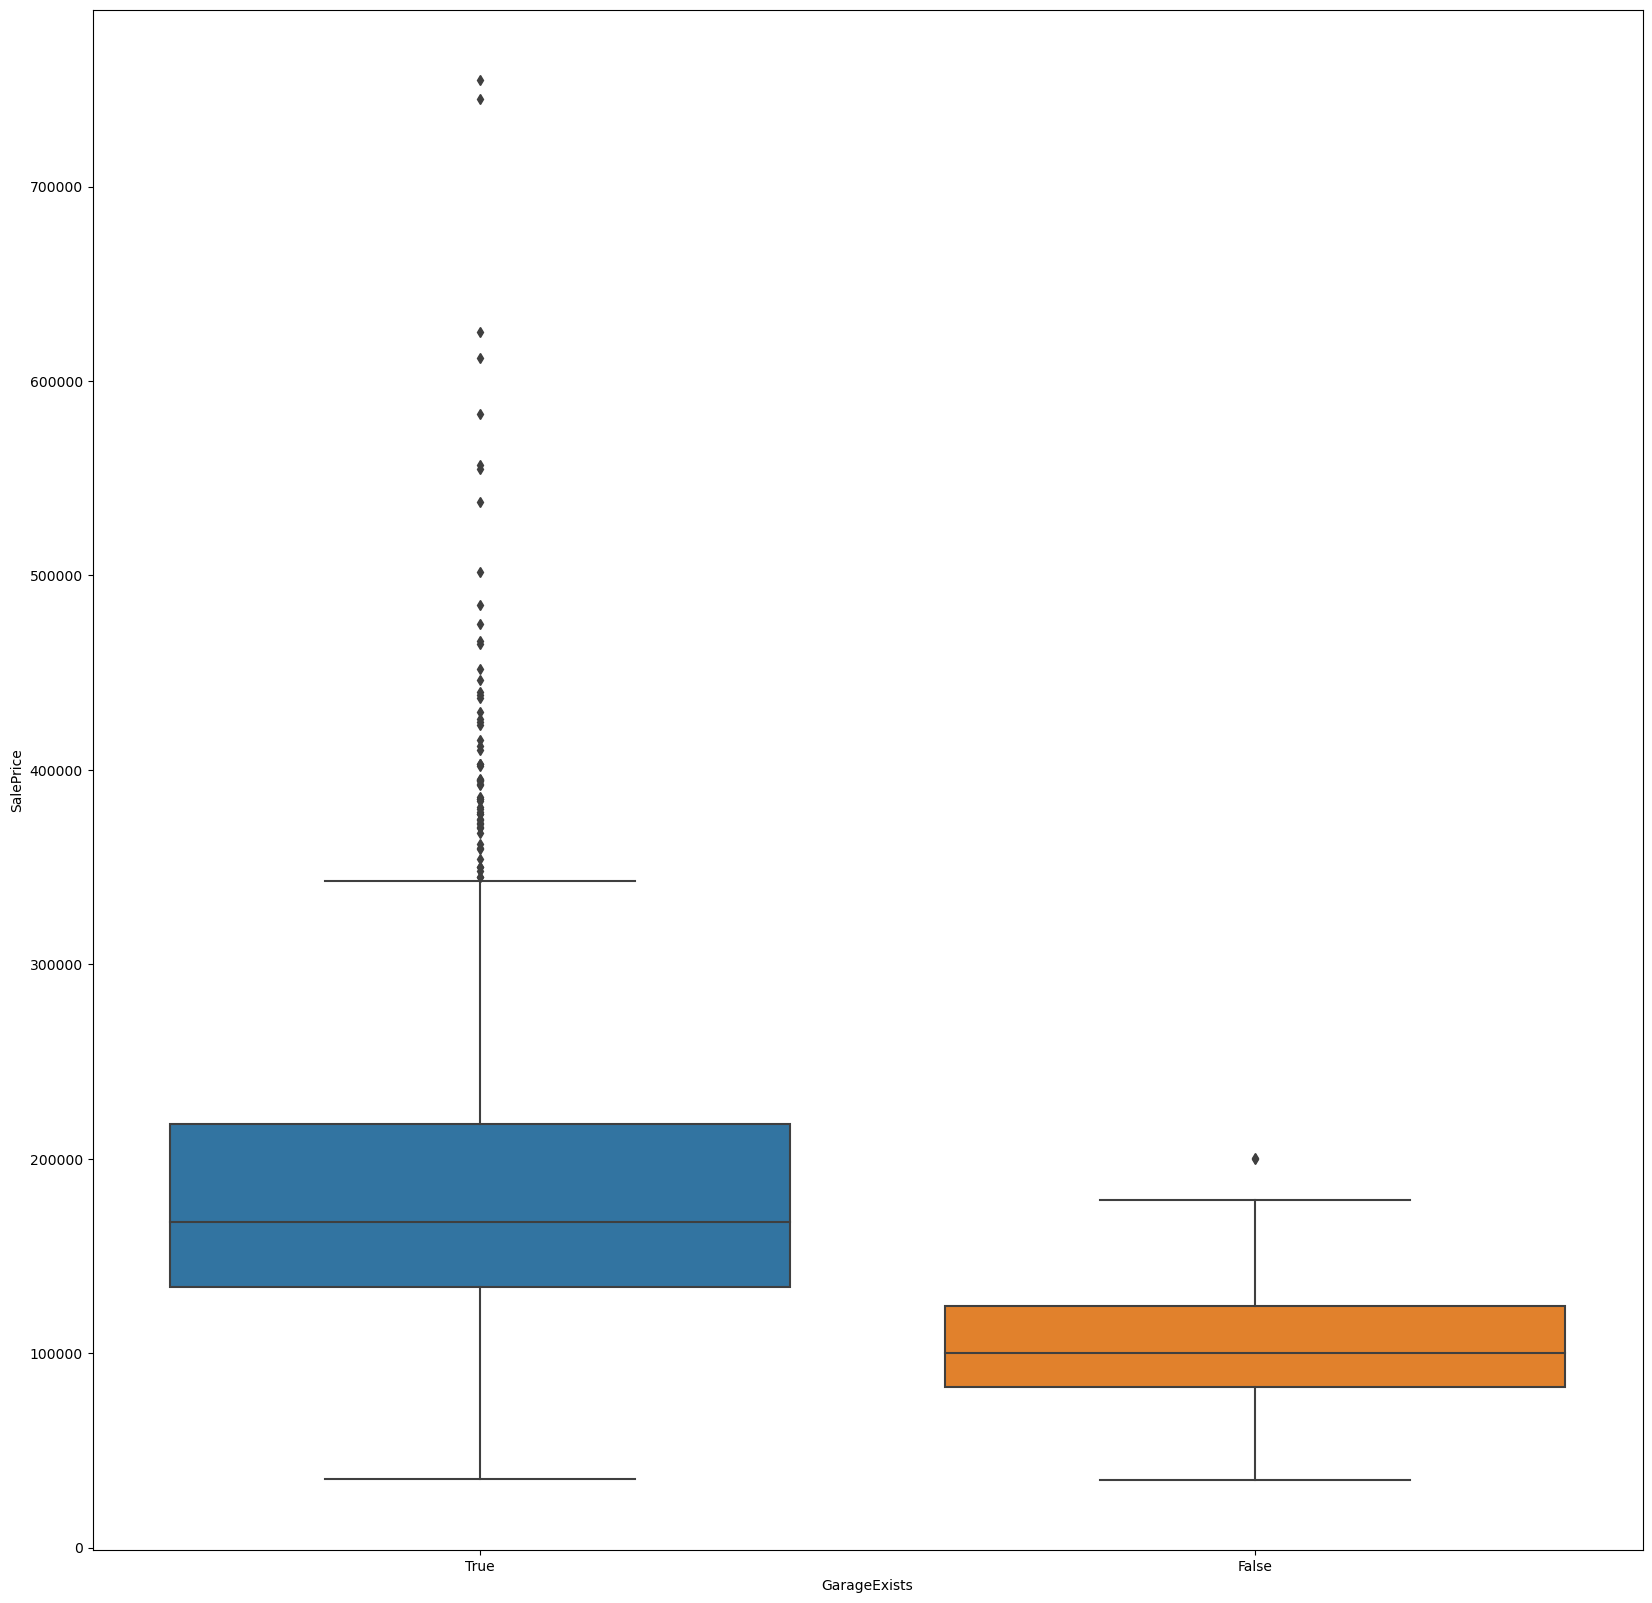

In [131]:
f=plt.figure(figsize=(20,20))
sb.boxplot(data = Garage, orient='v', x='GarageExists', y='SalePrice')

median, mean and quartiles sale price of houses with no garage are lower than houses with garages
Therfore, sale price does get affected by presence of garage, as houses with a garage generally cost more